<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Deep Learning con Redes Neuronales Convolucionales (CNN). Clasificación de Imágenes de Cáncer de Mama</h1> </div>

Este cuaderno presenta un análisis de imágenes médicas para la detección de cáncer de mama. Se utilizará el dataset **The mini-MIAS database of mammograms** que contiene mamografías digitalizadas con diversos tipos de anomalías.

El objetivo es desarrollar un modelo de aprendizaje automático capaz de identificar signos de cáncer de mama en las imágenes.

El cuaderno se organiza de la siguiente manera:


- [1.Descripción del dataset](#seccion-1)
- [2. Visualización de una imagen](#seccion-2)
- [3. Creación de dataset](#seccion-3)
- [4. Carga del dataset](#seccion-4)
- [5. Relación de imagenes y salida](#seccion-5)
- [6. Carga de imágenes](#seccion-6)
- [7. Visualización](#seccion-7)
- [8. Creación y carga de archivo pikcle](#seccion-8)
- [9. Visualización de imágen](#seccion-9)

<a id="seccion-1"></a>

# Descripción del dataset #

En el presente trabajo se usa el dataset público [**The mini-MIAS database of mammograms**](http://peipa.essex.ac.uk/info/mias.html) el cual contiene imágenes de mamografías de la Mammographic Image Analysis Society (MIAS). Fue creado por el Dr. John Suckling en la Universidad de Essex, Reino Unido. El objetivo del dataset es proporcionar una base de datos de imágenes de mamografías para el desarrollo y evaluación de sistemas de procesamiento y análisis de imágenes médicas.

El dataset consiste en 322 imágenes de mamografías digitalizadas de 161 pacientes, cada una con una resolución de 1024x1024 píxeles y una profundidad de 8 bits. Las imágenes contienen varias anomalías como microcalcificaciones, masas circunscritas, distorsiones arquitecturales y asimetrías. Todas las imágenes están en formato Portable Gray Map (PGM).

Este dataset ha sido ampliamente utilizado en la investigación sobre detección asistida por computadora de cáncer de mama. Proporciona una colección de casos reales para el entrenamiento y prueba de algoritmos de aprendizaje automático para la detección y clasificación de anomalías en mamografías.

<a id="seccion-2"></a>

#  Visualización de una imagen #

Para comprender la estructura de los archivos PGM que componen este dataset, cargaremos una muestra de las imágenes.

Encabezado: P5
Ancho: 1024
Alto: 1024
Max Valor: 255


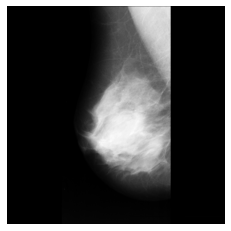

In [16]:
import struct
import matplotlib.pyplot as plt
import numpy as np

def leer_imagen_pgm(ruta):

  with open(ruta, 'rb') as f:
    
    # Leer encabezado
    header = f.readline().decode().strip()

    # Leer dimensiones
    width, height = [int(v) for v in f.readline().decode().strip().split()] 

    # Leer máximo valor de pixel
    max_val = int(f.readline().decode().strip())  

    # Leer datos de pixeles  
    pixels = []
    for i in range(height):
      row = struct.unpack("{}B".format(width), f.read(width))
      pixels.append(row)

  return header, width, height, max_val, pixels

# Mostrar imagen
def mostrar_imagen(imagen):
  
  plt.imshow(imagen, cmap='gray')
  plt.axis('off')
  plt.show()

# Imagen 1
ruta = 'mdb001.pgm'
header, width, height, max_val, pixels = leer_imagen_pgm(ruta)

print("Encabezado:", header)
print("Ancho:", width)
print("Alto:", height)
print("Max Valor:", max_val)

# Convertir a NumPy para mostrar
imagen = np.array(pixels, dtype=np.uint8)

mostrar_imagen(imagen)



Como se puede apreciar en la imagen PGM anterior está tiene un encabezado que contiene metadatos sobre la imagen.

Los datos incluidos son:

- **Tipo PGM:** Indica que es un archivo PGM y la variante usada (P2 para ASCII o P5 para Binario).
- **Ancho:** Especifica el ancho de la imagen en píxeles.
- **Alto:** Especifica el alto de la imagen en píxeles.
- **Max Valor:** Es el máximo valor numérico posible para un píxel, determinado por la profundidad en bits.

<a id="seccion-3"></a>

# Creación de dataset #

La información textual asociada a cada imagen del dataset se encuentra almacenada en el archivo Info_tag. Este archivo contiene etiquetas o tags que describen características de las mamografías como la presencia de anomalías.

Para facilitar el análisis y procesamiento de estos datos, se extrajo la información relevante y se organizo en una estructura tabular. 

Por ello, a partir del archivo Info_tag se genera un dataset en formato CSV (valores separados por comas). Este archivo CSV contiene una columna para el nombre de cada imagen PGM y columnas adicionales que codifican la metadata asociada.

Algunos de los tags más relevantes que se incluyen como columnas son:

- Tipo de anomalía (masa, calcificación, asimetría) 

- Severidad o malignidad 

- Coordenadas de regiones de interés

- Clasificación BI-RADS


In [17]:
# para crear el csv 
import csv

def txt_a_csv(archivo_entrada, archivo_salida):
    with open(archivo_entrada, 'r') as entrada, open(archivo_salida, 'w', newline='') as salida:
        # Leer el archivo de texto y escribir en el archivo CSV
        lector = csv.reader(entrada, delimiter=' ')
        escritor = csv.writer(salida, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

        for fila in lector:
            escritor.writerow(fila)

# Archivos:
archivo_txt = 'Info_tag.txt'
archivo_csv = 'Info_tag.csv'
txt_a_csv(archivo_txt, archivo_csv)


<a id="seccion-4"></a>

# Carga del dataset #

In [18]:
import pandas as pd

# Nombres de las columnas
nombres_columnas = ['Imagen', 'Character_of_background_tissue', 'Class_of_abnormality_present', 'Salida','x_image_coordinates','y_image_coordinates', 'Approximate_radius']  

# Ruta del archivo CSV
archivo_csv = 'Info_tag.csv'

# Cargar el archivo CSV en un DataFrame de pandas con nombres de columnas
data_frame = pd.read_csv(archivo_csv, sep=',', header=None, names=nombres_columnas)

# Mostrar las primeras filas del DataFrame
#print(data_frame.head())
data_frame

,Imagen,Character_of_background_tissue,Class_of_abnormality_present,Salida,x_image_coordinates,y_image_coordinates,Approximate_radius
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0
...,...,...,...,...,...,...,...
325,mdb318,D,NORM,NaN,NaN,NaN,NaN
326,mdb319,D,NORM,NaN,NaN,NaN,NaN
327,mdb320,D,NORM,NaN,NaN,NaN,NaN
328,mdb321,D,NORM,NaN,NaN,NaN,NaN


<a id="seccion-5"></a>

# Relación de imagenes y salida #

Del dataset CSV generado, seleccionaremos las columnas de interés para el modelo de clasificación.

La columna 'Imagen' contiene los nombres de los archivos PGM asociados a cada fila.

La columna 'Salida' representa la variable objetivo, es decir, la etiqueta de clase a predecir. Esta columna puede tomar 3 valores:

- 'B' para benigno, en casos confirmados como no malignos.
- 'M' para maligno, que indica la presencia de anomalías cancerosas.
- 'N' para aquellos casos no concluyentes o sin hallazgos relevantes, que consideraremos como normales.

In [19]:
# Copiar el DataFrame
data_frame_final = data_frame.copy()

# Borrar las columnas no deseadas
columnas_a_mantener = ['Imagen', 'Salida']
data_frame_final = data_frame_final[columnas_a_mantener]

# Reemplazar NaN por "N" en todo el DataFrame
data_frame_final = data_frame_final.fillna("N")

# Mostrar las primeras filas del DataFrame copiado y modificado
data_frame_final

,Imagen,Salida
0,mdb001,B
1,mdb002,B
2,mdb003,N
3,mdb004,N
4,mdb005,B
...,...,...
325,mdb318,N
326,mdb319,N
327,mdb320,N
328,mdb321,N


<a id="seccion-6"></a>

# Carga de imágenes #

In [27]:
import pandas as pd
import imageio.v2 as imageio
import os
import numpy as np

# Ruta del directorio que contiene las imágenes PGM 
directorio_imagenes = ''

# Lista para almacenar imágenes y etiquetas
imagenes = []
etiquetas = []

# Iterar sobre las filas del DataFrame
for indice, fila in data_frame_final.iterrows():
    nombre_imagen = fila['Imagen'] + '.pgm'  
    ruta_imagen = os.path.join(directorio_imagenes, nombre_imagen)

    # Leer la imagen PGM
    imagen = imageio.imread(ruta_imagen)

    # Almacenar la imagen y la etiqueta
    imagenes.append(imagen)
    etiquetas.append(fila['Salida'])

# Convertir listas a arreglos numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)

<a id="seccion-7"></a>

# Visualización #

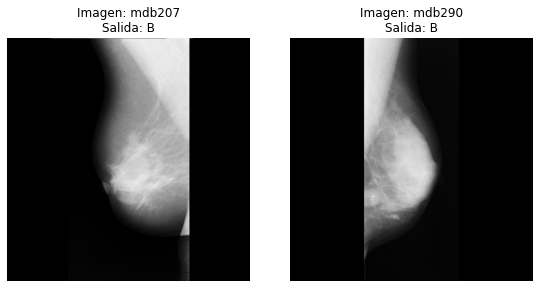

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Número de imágenes a visualizar
N = 2

# Crear una lista de índices y mezclarla
indices_mezclados = list(range(len(imagenes)))
np.random.shuffle(indices_mezclados)
indices_seleccionados = indices_mezclados[:N]

# Ajustar el tamaño de la figura y los subgráficos
fig, axs = plt.subplots(1, N, figsize=(8, 4))

# Visualizar las N imágenes y sus salidas
for i, indice_seleccionado in enumerate(indices_seleccionados):
    imagen = imagenes[indice_seleccionado]
    etiqueta = etiquetas[indice_seleccionado]
    nombre_imagen = data_frame_final['Imagen'].iloc[indice_seleccionado]

    # Mostrar la imagen en el subgráfico actual
    axs[i].imshow(imagen, cmap='gray')
    axs[i].set_title(f'Imagen: {nombre_imagen}\nSalida: {etiqueta}')
    axs[i].axis('off')

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con todas las imágenes
plt.show()


<a id="seccion-8"></a>

# Creación y carga de archivo pikcle #

In [29]:
#<div id="Exploracion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Descripción y exploración del dataset MNIST</h2> </div>

import pickle
#imagenes=None
#etiquetas=None
# Guardar las imágenes y etiquetas en un archivo pickle
with open('imagenes_mama_y_etiquetas.pkl', 'wb') as archivo_pickle:
    pickle.dump((imagenes, etiquetas), archivo_pickle)


<div id="CargaDatasetPreparado" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Carga de dataset preparado</h2> </div>

In [24]:
from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
from PIL import Image

from sklearn.metrics import confusion_matrix
from sklearn import metrics  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.metrics import specificity_score
from matplotlib import*
from matplotlib.cm import register_cmap
import matplotlib.pyplot as plt 

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import model_from_json
from keras.models import load_model

from sklearn.svm import SVC #SVR para regresión
from sklearn.metrics import classification_report
from keras import models
from keras.layers import BatchNormalization, MaxPool2D, GlobalMaxPool2D
#Arquitecturas de Transfer learning. Puedes configurar parámetros específicos de cada arquitectura
from tensorflow.keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, concatenate, Dropout
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D

print('Módulos importados')

Módulos importados


In [25]:
# Funciones para guardar y cargar objetos pickle
def guardarObjeto(pipeline,nombreArchivo):
    print("Guardando Objeto en Archivo") 
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print("Objeto Guardado en Archivo")  
def cargarObjeto(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
        print("Objeto Cargado desde Archivo") 
    return pipeline
# Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Guardada en Archivo")   
    
def cargarNN(nombreArchivo):
    model = load_model(nombreArchivo+'.h5')    
    print("Red Neuronal Cargada desde Archivo") 
    return model

# Función para medir la calidad de modelos
def obtenerResultados(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    specificity = specificity_score(y_test, y_pred, average='macro')

    accuracy=str(round(accuracy, 4))
    precision=str(round(precision, 4))
    recall=str(round(recall, 4))
    f1=str(round(f1, 4))
    specificity=str(round(specificity, 4))
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall o Sensitivity:", recall)
    print("F1-Score:", f1)
    print("Specificity:", specificity)
    
    # Se evalúa el modelo con otras medidas de calidad y se presenta la matriz de confusión
    MAE=metrics.mean_absolute_error(y_test, y_pred)
    MSE=metrics.mean_squared_error(y_test, y_pred)
    RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    MAE=str(round(MAE, 4))
    MSE=str(round(MSE, 4))
    RMSE=str(round(RMSE, 4))

    print('Mean Absolute Error (MAE):', MAE)  
    print('Mean Squared Error (MSE):', MSE)  
    print('Root Mean Squared Error (RMSE):', RMSE) 

    #plt.figure(figsize=(15,10))
    fx=sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt=".2f",cmap="GnBu")
    fx.set_title('Confusion Matrix \n');
    fx.set_xlabel('\n Valores de predicción\n')
    fx.set_ylabel('Valores reales\n');
    #fx.xaxis.set_ticklabels(_load_label_names())
    #fx.yaxis.set_ticklabels(_load_label_names())
    plt.show()

    #return accuracy, precision, recall, f1, specificity, MAE, MSE, RMSE
print('Funciones para guardar y cargar modelos personalizados')

Funciones para guardar y cargar modelos personalizados


In [6]:
#type(etiquetas_cargadas)

In [32]:
import pickle

# Cargar las imágenes y etiquetas desde el archivo pickle
with open('imagenes_mama_y_etiquetas.pkl', 'rb') as archivo_pickle:
    imagenes_cargadas, etiquetas_cargadas = pickle.load(archivo_pickle)

import struct
import matplotlib.pyplot as plt
import numpy as np
print(imagenes_cargadas.shape)

(330, 1024, 1024)


In [40]:
# Encontrar índices de elementos que son 'N'
indices_a_eliminar = np.where(etiquetas_cargadas == 'N')[0]

# Eliminar elementos con 'N'
etiquetas_cargadas = np.delete(etiquetas_cargadas, indices_a_eliminar)
imagenes_cargadas = np.delete(imagenes_cargadas, indices_a_eliminar, axis=0)

print(etiquetas_cargadas)
print(imagenes_cargadas.shape)

['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B']
(123, 1024, 1024)


<a id="seccion-9"></a>

# Visualización de imágen #

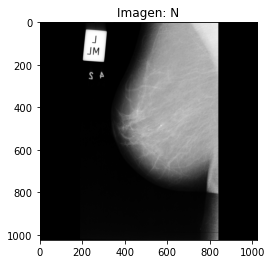

In [33]:
# Seleccionar una imagen y su etiqueta
indice_a_visualizar = 11 # 23 es M  
imagen_seleccionada = imagenes_cargadas[indice_a_visualizar]
etiqueta_seleccionada = etiquetas_cargadas[indice_a_visualizar]

# Mostrar la imagen y su salida
plt.imshow(imagen_seleccionada, cmap='gray')
plt.title(f'Imagen: {etiqueta_seleccionada}')
#plt.axis('off')
plt.show()

In [34]:
# Mapeo de valores
mapping = {'N': 0, 'B': 1, 'M': 2}
#mapping = {'B': 1, 'M': 0}

# Función de mapeo
def map_values(value):
    return mapping[value]

# Aplicar la función de mapeo a cada elemento del array
etiquetas_cargadas = np.vectorize(map_values)(etiquetas_cargadas)
print(etiquetas_cargadas)

[1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 2 0 1 0 0 2 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 1 0 0 0 0 0 1 0 0 2 0
 0 2 0 0 0 0 1 1 0 1 0 0 0 0 0 0 2 1 2 0 0 2 0 1 0 1 0 0 2 0 1 2 0 1 0 0 2
 2 0 0 0 2 0 2 0 0 2 1 0 0 2 2 1 1 0 0 2 0 1 1 0 2 0 0 0 0 0 0 2 1 0 1 2 1
 0 0 2 0 1 0 1 0 0 2 0 0 2 0 1 0 0 1 0 1 0 1 0 0 2 2 0 0 0 1 0 0 2 2 0 2 0
 0 2 0 2 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 2 0 1 0 2 1 0 2 0 2 1 2 1 0 2 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 0 0 2 0 2 0 0 1 0 2 2 2 1 2 0 0 1 2 0 0 1 2 2 0 0
 1 2 0 0 2 0 0 0 0 0 0 0 2 2 0 2 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0]


In [35]:
#DIVISION EN: X VARIABLES (VALORES DE CADA PIXEL ENTRE 0-255), Y SALIDA (3 CATEGORIAS -> NÚMEROS ENTRE 0-2)
X_tr = imagenes_cargadas # iloc ensures X_tr will be a dataframe
y_tr = etiquetas_cargadas
print("X_train shape",X_tr.shape)
print("y_train shape",y_tr.shape)

print('Reshape a 32x32x3') # Los modelos preentrenados admiten un mínimo de tamaño de imagen
X_tr = np.repeat(X_tr[:, :, :, np.newaxis], 3, axis=-1)
X_tr = tf.image.resize(X_tr, (32, 32))
print("X_train shape",X_tr.shape)

## Se convierte a uint8.  Este tipo de dato tiene un rango de valores que va desde 0 hasta 255, 
## ya que utiliza 8 bits de memoria para almacenar la información.
X_tr = np.uint8(X_tr)

X_train shape (330, 1024, 1024)
y_train shape (330,)
Reshape a 32x32x3
X_train shape (330, 32, 32, 3)


In [36]:
#SPLIT EN TRAIN Y TEST
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42, stratify=y_tr)
#random_state: permite que siempre tengamos las mismas particiones, de tal manera que los resultados se puedan reproducir
#stratify=y permite preservar la distribución de las etiquetas (los números)
print(X_train.shape)
print(X_test.shape)
X_train = X_train/255
X_test = X_test/255
print('Datos normalizados')

(264, 32, 32, 3)
(66, 32, 32, 3)
Datos normalizados


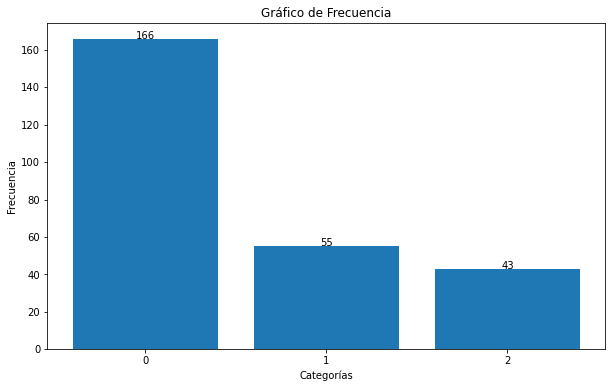

In [37]:
import matplotlib.pyplot as plt
from collections import Counter
Y=y_train.tolist()
#Y.extend(y_test.tolist()) #para analizar la frecuencia de todo el conjunto de datos

# Utiliza Counter para contar las frecuencias de los elementos en la lista
frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

# Aumenta el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras
plt.bar(elementos, frecuencias)

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

# Establece las etiquetas del eje X
plt.xticks(elementos)

# Muestra los valores de los elementos en el gráfico
for i, v in enumerate(frecuencias):
    plt.text(elementos[i], v + 0.1, str(v), ha='center')

# Muestra el gráfico
plt.show()

In [201]:
#!pip install imbalanced-learn

In [658]:
import numpy as np
from imblearn.over_sampling import SMOTE
from keras.preprocessing.image import ImageDataGenerator

# Supongamos que X_train e y_train son tus datos originales desbalanceados
# y que cada imagen tiene dimensiones de 32x32x3

# Reshape X_train para que tenga la forma (número de muestras, 32*32*3)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

# Aplicar SMOTE a las clases minoritarias
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_reshaped, y_train)

# Revertir la forma después de aplicar SMOTE
X_resampled = X_resampled.reshape(-1, 32, 32, 3)

# Crear un generador de imágenes con técnicas de aumento de datos
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Aplicar aumento de datos a las clases minoritarias
for label in np.unique(y_resampled):
    if np.sum(y_resampled == label) < np.max(np.bincount(y_train)):
        class_indices = np.where(y_resampled == label)[0]
        for idx in class_indices:
            img = X_resampled[idx]
            img = img.reshape((1,) + img.shape)  # Añadir dimensión del lote (batch dimension)
            for _ in datagen.flow(img, batch_size=1):
                break  # Salir después de una nueva imagen generada

# Ahora, X_resampled e y_resampled contienen el conjunto de datos balanceado con aumento de datos
print('Balanceo de clases')

Balanceo de clases


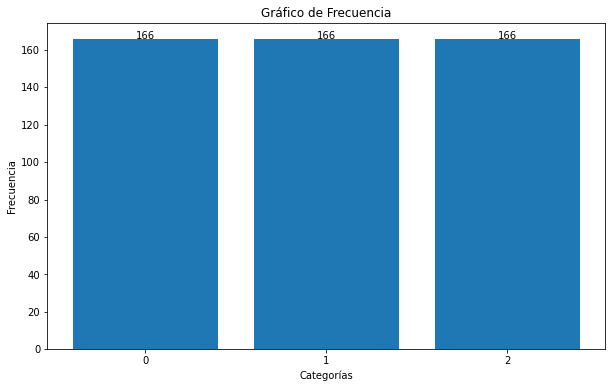

In [659]:
y_train=y_resampled
X_train=X_resampled

Y=y_train.tolist()
#Y.extend(y_test.tolist()) #para analizar la frecuencia de todo el conjunto de datos

# Utiliza Counter para contar las frecuencias de los elementos en la lista
frecuencias = Counter(Y)

# Separa las claves (elementos) y los valores (frecuencias) en listas separadas
elementos = list(frecuencias.keys())
frecuencias = list(frecuencias.values())

# Aumenta el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras
plt.bar(elementos, frecuencias)

# Etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Frecuencia')

# Establece las etiquetas del eje X
plt.xticks(elementos)

# Muestra los valores de los elementos en el gráfico
for i, v in enumerate(frecuencias):
    plt.text(elementos[i], v + 0.1, str(v), ha='center')

# Muestra el gráfico
plt.show()

In [514]:
print(X_test.shape)
print(y_test.shape)

(66, 32, 32, 3)
(66,)


<div id="DesarrolloCNN" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Desarrollo de CNN</h2> </div>

<div style="color:#106ba3"><h3>Preparación de estructura de imágenes para CNN</h3> </div>

La CNN personalizada requiere trabajar con **tensores**.

Un tensor es una estructura matemática multidimensional que generaliza conceptos como escalares (0 dimensiones), vectores (1 dimensión) y matrices (2 dimensiones) a dimensiones superiores.

En esta caso, 3 dimensiones: (32,32,3), que sería 32 x 32 píxeles y 3 canales. 

In [46]:
num_categorias = 2
# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train, num_classes=num_categorias)
y_test = to_categorical(y_test, num_classes=num_categorias)
print('Transformación de salida a binario')

Transformación de salida a binario


In [62]:
num_classes = num_categorias
input_shape = (32, 32, 3)

#iniciamos el modelo
classifierCNN = Sequential()
#añadimos una capa convolucional con 32 filtros de 3x3
#padding='same' aplica un relleno de ceros a la entrada de tal manera que la salida tenga el mismo tamaño que la entrada
#Es decir, el relleno se agrega para que el resultado de la convolución/pooling tenga las mismas dimensiones que la entrada 
classifierCNN.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape = input_shape))
#añadimos otra capa convolucional con 32 filtros de 3x3
classifierCNN.add(Conv2D(32, (3, 3), activation='relu'))
#añadimos una capa de pooling de 3x3
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
#este dropout desactiva el 25% de las conexiones entre las neuronas, lo cual mejora los resultados
#classifierCNN.add(Dropout(0.25))

#repetimos todas las capas otra vez
#classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
#classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
#classifierCNN.add(Dropout(0.25))

classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
classifierCNN.add(MaxPooling2D(pool_size=(2, 2)))
#classifierCNN.add(Dropout(0.25))

#repetimos todas las capas otra vez
#classifierCNN.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#classifierCNN.add(Conv2D(64, (3, 3), activation='relu'))
#classifierCNN.add(MaxPooling2D(pool_size=(3, 3)))
#classifierCNN.add(Dropout(0.25))

#añadimos una capa para convertir las matrices en un vector
classifierCNN.add(Flatten())
#añadimos una capa con 512 neuronas
classifierCNN.add(Dense(32, activation='relu'))
#classifierCNN.add(Dropout(0.5))
#en la última capa tiene que hacer tantas neuronas como clases haya, en este caso 10
classifierCNN.add(Dense(num_classes, activation='softmax'))
#compilamos el modelo
classifierCNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
classifierCNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                 

<div style="color:#106ba3"><h3>Entrenamiento y evaluación en Test</h3> </div>

In [63]:
batch_size = 2
epochs = 2
h = classifierCNN.fit(X_train,y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test))

Epoch 1/2
49/49 [==============================] - 1s 11ms/step - loss: 0.7226 - accuracy: 0.5306 - val_loss: 0.6921 - val_accuracy: 0.5600
Epoch 2/2
49/49 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5102 - val_loss: 0.6916 - val_accuracy: 0.5600


In [478]:
#classifierCNN=cargarNN('Objetos/classifierCNN')

In [55]:
test_acc_cnn = classifierCNN.evaluate(X_test, y_test, verbose=0)
acc_cnn=str(round(test_acc_cnn[1], 4))
print('\nCNN Accuracy: ',acc_cnn)
error_rate_cnn=str(round(test_acc_cnn[0], 4))
print('\nCNN Loss: ',acc_cnn)


CNN Accuracy:  0.52

CNN Loss:  0.52


In [640]:
guardarNN(classifierCNN,'Objetos/classifierCNN')

Guardando Red Neuronal en Archivo
Red Neuronal Guardada en Archivo


In [50]:
#Predicciones del conjunto de Test
y_pred = classifierCNN.predict(X_test)
#argmax identifica el valor máximo para determinar la categoría

y_test_single_column = np.argmax(y_test, axis=1)
y_pred_single_column = np.argmax(y_pred, axis=1)

#y_pred = np.argmax(y_pred, axis=-1) 
#y_pred = y_pred.flatten()
#Comparación de algunas predicciones
dataframeFinal=pd.DataFrame({'real':y_test_single_column, 'predicción': y_pred_single_column})
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
dataframeFinal.head(30)

1/1 [==============================] - 0s 152ms/step


,real,predicción
0,1,1
1,1,1
2,1,1
3,0,1
4,0,1
5,1,1
6,0,1
7,1,1
8,0,1
9,1,1


C:\Users\rhurtadoo\.conda\envs\Proyecto2022\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.56
Precision: 0.28
Recall o Sensitivity: 0.5
F1-Score: 0.359
Specificity: 0.5
Mean Absolute Error (MAE): 0.44
Mean Squared Error (MSE): 0.44
Root Mean Squared Error (RMSE): 0.6633


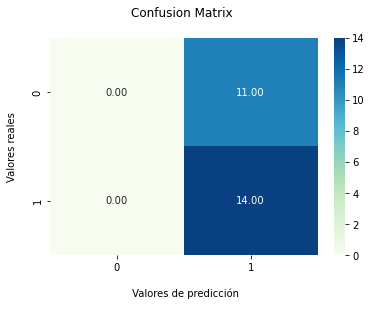

In [51]:
obtenerResultados(y_test_single_column, y_pred_single_column)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


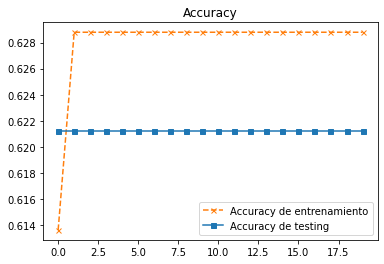

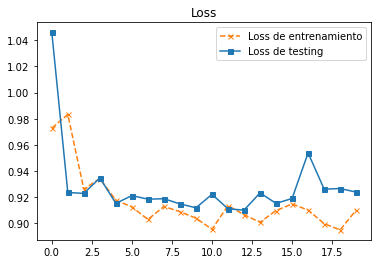

In [626]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, marker='x', linestyle='--', color='C1', ms=5, label='Loss de entrenamiento')
plt.plot(epochs, val_loss, marker='s', linestyle='-', color='C0', ms=5, label='Loss de testing')
plt.title('Loss')
plt.legend()
plt.show()

In [627]:
# Se presenta la calidad de clasificación por categoría y a nivel general
print(classification_report(y_test_single_column,y_pred_single_column))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        41
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        11

    accuracy                           0.62        66
   macro avg       0.21      0.33      0.26        66
weighted avg       0.39      0.62      0.48        66



C:\Users\rhurtadoo\.conda\envs\Proyecto2022\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhurtadoo\.conda\envs\Proyecto2022\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rhurtadoo\.conda\envs\Proyecto2022\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)